

# Derivadas



In [1]:
# Para imprimir todas las líneas
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
# Solo la última
InteractiveShell.ast_node_interactivity = "last_expr"

Importación de las librerías necesarias

In [1]:
import numpy as np
from sympy import * # Librería de Calculo
from sympy.plotting import plot as symplot # Librería para las gráficas
from sympy.abc import x, y, h # Carga de un simbolico "x"
from sympy.plotting.pygletplot import PygletPlot as Plot # Librería para las gráficas

## Límites en Python

El concepto de límite es la base del Cálculo Diferencial.

Recordad que:

$f'(x)=\lim\limits_{h \to 0} \frac{f(x+h)-f(x)}{h}$

Podemos calcular límites en Python utilizando la expresión ```limit(funcion, variable, punto, lateral)``` proporcionada por la librería Sympy.

In [2]:
# Ejemplo
# x = symbols('x')
limit(sin(x)/x, x, 0)
limit(1/x, x, 0, '+')
limit(x**2, x, 0, '-')

0

In [3]:
limit((cos(x + h) - cos(x))/h, h, 0) # Cálculo de la derivada a partir de su definición

-sin(x)

En este caso, se calcula el límite cuando h tiende a cero.

## Derivada

#### Cálculo de la derivada
Para calcular la derivada sin utilizar su definición, se usará ```diff("funcion")```.

Ejemplo:

In [4]:
diff(cos(x)) # Calcula la derivada que coincide con la obtenida a partir de su definición

-sin(x)

In [5]:
d1 = diff(x**2, x) # Calcula la derivada de una expresión
d1

2*x

In [6]:
d1 = (x**2).diff(x) # Otra sintaxis para calcular la derivada
d1

2*x

In [7]:
d2 = Derivative(x**2,x) # Expresión matemática de la derivada
d2

Derivative(x**2, x)

In [9]:
d2.doit() # Calcula la derivada a partir de su expresión matemática

2*x

#### Representación gráfica

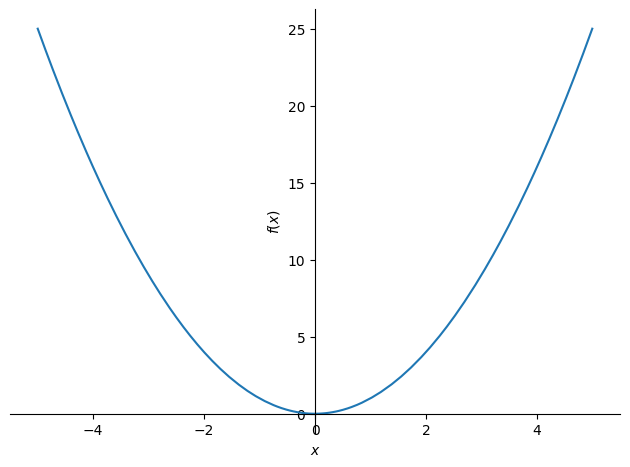

In [8]:
p = symplot(x**2,(x, -5, 5)) # Representación gráfica de una función matemática

Representación gráfica de dos curvas en el mismo gráfico

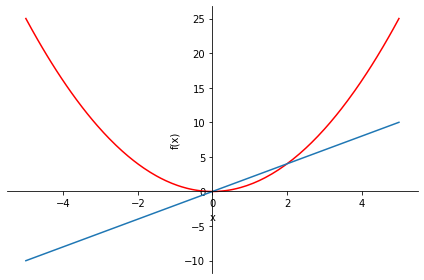

In [11]:
p = symplot(x**2,d1,(x, -5, 5),show=False) # Se crea el gráfico con las dos funciones, el rango de representación y se desactiva la funcionalidad de representación directa
p[0].line_color = 'red' # Cambia el color de la primera gráfica
p.show() # Mostrar el gráfico

#### Sustitución
Cuando se definen las funciones de manera simbólica, es posible calcular el valor de dicha función para un determinado valor de _x_ como sigue:

In [9]:
d1.evalf(subs={x:10})

20.0000000000000

o

In [13]:
d1.subs(x,10)

20

### Derivadas Parciales

In [14]:
g = x**2 + y**3

In [15]:
diff(g,x) # Primera derivada parcial con respecto a x

2*x

In [16]:
diff(g,y) # Primera derivada parcial con respecto a y

3*y**2

In [17]:
# Segunda derivada parcial con respecto a x
diff(g,x,2) # o diff(g,x,x)

2

In [18]:
diff(g,y,y) # Segunda derivada parcial con respecto a y

6*y

## Análisis de funciones

### Definición de una función

In [19]:
num = 2 * (x**2 - 9)
den = (x**2 - 4)

In [20]:
f = num / den
f

(2*x**2 - 18)/(x**2 - 4)

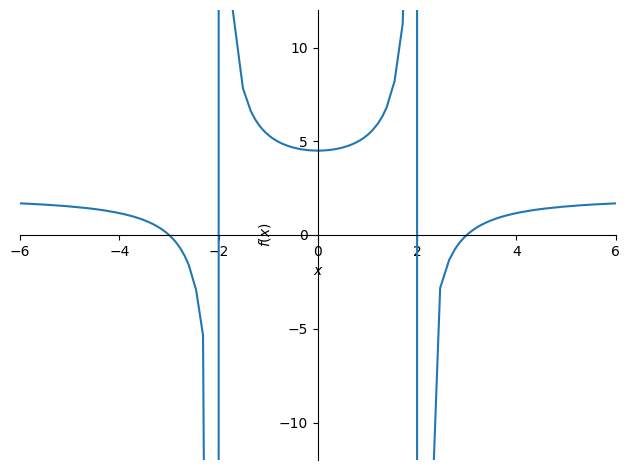

In [13]:
num = 2 * (x**2 - 9)
den = (x**2 - 4)
f = num / den
p = symplot(f, xlim=(-6,6), ylim=(-12,12)) 

### Asíntotas Horizontales

In [14]:
limit(f,x,oo) # oo representa infinito

2

### Asíntotas Verticales


Se iguala el denominador a cero y se almacenan las raíces en una variable.

In [15]:
r = solve(den, x)
r

[-2, 2]

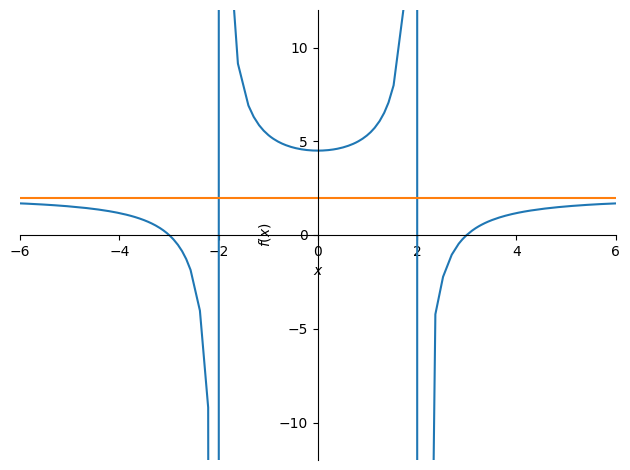

In [16]:
# Grafica con la asíntota horizontal
p = symplot(f,2, xlim=(-6,6), ylim=(-12,12),show=false)
p.show()

### Puntos críticos

Calculamos la primera derivada e igualamos a cero.


In [25]:
f1 = diff(f)
f1

4*x/(x**2 - 4) - 2*x*(2*x**2 - 18)/(x**2 - 4)**2

In [17]:
criticosX = list(solveset(f1, x))
criticosX

NameError: name 'f1' is not defined

Así pues, en este ejemplo, se tiene un único punto crítico en x = 0

In [27]:
criticosY = [f.subs(x, a) for a in criticosX]
criticosY

[9/2]

Para ver si es un máximo o un mínimo, se analizará el signo de la segunda derivada.


### Segunda derivada

In [18]:
f2 = diff (f, x, 2) # Calculamos la segunda derivada
f2

4*(-4*x**2/(x**2 - 4) + (x**2 - 9)*(4*x**2/(x**2 - 4) - 1)/(x**2 - 4) + 1)/(x**2 - 4)

### Sustituimos el/los puntos críticos en la segunda derivada

In [19]:
segderiv = [f2.subs(x, cr) for cr in criticosX]
segderiv

NameError: name 'criticosX' is not defined

Es positivo, luego hay un mínimo relativo en x = 0

Ahora se representan los puntos críticos

In [2]:
import matplotlib.pyplot as plt
import numpy as np
xx = np.linspace(-10, 10, 1000)
yy = lambdify(x, f)(xx)
plt.plot(xx, yy)
plt.plot(criticosX, criticosY, 'k*')
plt.show()

NameError: name 'lambdify' is not defined

## Optimización

Para resolver un problema de optimización, normalmente se siguen los siguientes pasos:

*   Identificar las variables del problema
*   Encontrar la función a optimizar y, para el caso de dos variables (x,y),  reemplazar ```y = f(x)```
*   Reducir la función a una única variable independiente
*   Comprobar el dominio de admisión de las soluciones y descartar las absurdas
*   Calcular el máximo o mínimo de la función objetivo según los requisitos del problema


**Ejemplo:**

Queremos construir una caja cuya longitud sea tres veces su anchura.  
El material usado para construir la tapa y la base cuesta 10 euros por metro cuadrado, mientras que el material usado para construir los lados cuesta 6 euros por metro cuadrado.  
Si la caja tiene que tener un volumen de 50 metros cúbicos, determina las dimensiones que minimizan el coste de construir la caja

In [31]:
# Hacemos un dibujo del problema
#    +--------+
#   /        /|
#  /        / |  altura
# +--------+  |
# |        |  |
# |        |  +
# |        | /
# |        |/  longitud
# +--------+
#   ancho -> x

In [32]:
# Queremos construir una caja cuya longitud sea tres veces su anchura.
ancho = x;
longitud = 3*ancho;

In [33]:
# Si la caja tiene que tener un volumen de 50 metros cúbicos
# Volumen = ancho * longitud * altura
# 50 = ancho * longitud * altura -> altura = 50/(ancho * longitud)
altura = 50/(ancho*longitud)
tapa = longitud*ancho
base = longitud*ancho
Coste1 = (tapa+base)*10
lateral1 = ancho*altura # el lado de la frente
lateral2 = 3*ancho*altura # el lado del lado
Coste2 = (lateral1*2 + lateral2*2 ) * 6 # 2 lados frontales y 2 lados laterales con un coste de 6
Costetotal = Coste1+Coste2
print('Coste total:', Costetotal)

# Calculamos la primera derivada
derivada=diff(Costetotal)

# Obtenemos los puntos criticos (primera derivada == 0
criticosX = list(N(solveset(derivada, x, domain=S.Reals))) # domain=S.Reals elimina números complejos del cálculo
criticosX = [cri for cri in criticosX if cri >= 0] # Solo las dimensiones positivas tienen sentido
print("Puntos criticos:", criticosX)

# Resultado del problema
for cri in criticosX:
  print(f'Las dimensiones que minimizan el coste son: Ancho = {cri} m, Longitud = {longitud.subs(x,cri)} m, Alto = {altura.subs(x,cri)} m')
  print(f'Y su coste total es {Costetotal.subs(x,cri)} €')

Coste total: 60*x**2 + 800/x
Puntos criticos: [1.88207205776206]
Las dimensiones que minimizan el coste son: Ancho = 1.88207205776206 m, Longitud = 5.64621617328617 m, Alto = 4.70518014440514 m
Y su coste total es 637.595141509567 €


### Optimización por búsqueda

La librería ```scipy``` contiene funciones que ayudan a buscar los mínimos de manera automática. No obstante, esta librería y ```sympy``` son incompatibles, así pues para hacer uso de ```scipy``` es necesario crear funciones estándar.

In [5]:
from scipy import optimize

# en este caso, sympy no puede utilizarse y, por lo tanto, se tiene que definir una función estándar manualmente
def f(x):
    return 60*x**2 + 800/x

# Esta expresión calcula el mínimo de una función f a partir de un punto inicial 
# en este caso, "1" es la estimativa inicial
optimize.fmin(f, 1)

ModuleNotFoundError: No module named 'scipy'

In [35]:
optimize.fminbound(f, -1, 2) # Igual que la anterior pero se tienen que indicar los puntos inicial y final de búsqueda

1.8820717255379549

# Ejercicios

## Ejercicio 1

Calcula el límite de las siguiente funciones y dibuja las mismas:

$\lim\limits_{x \to 0} \frac{x^3+5}{x^4+7}$

$\lim\limits_{x \to3+} \frac{x−3}{|x−3|}$

$\lim\limits_{x \to3-} \frac{x−3}{|x−3|}$

In [26]:
from sympy.abc import x, y

limit1 = limit((x**3+5)/(x**4+7),x, 0)
limit2 = limit((x-3)/abs(x-3),x,3,'+')
limit3 = limit((x-3)/abs(x-3),x,3,'-')
print(limit1, limit2, limit3)

5/7 1 -1


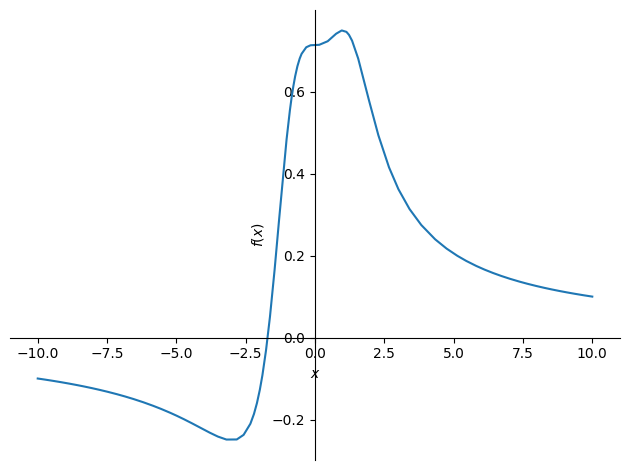

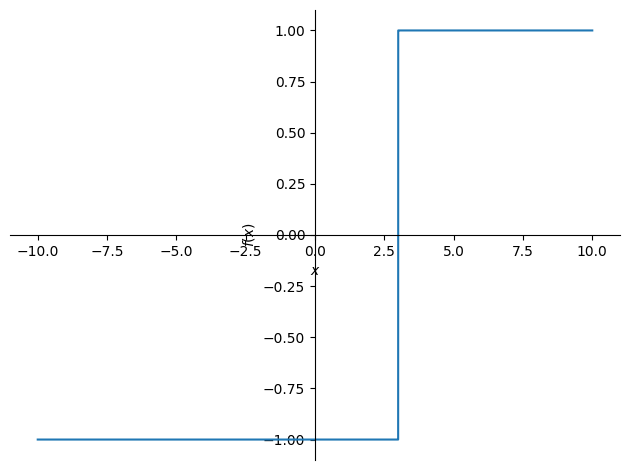

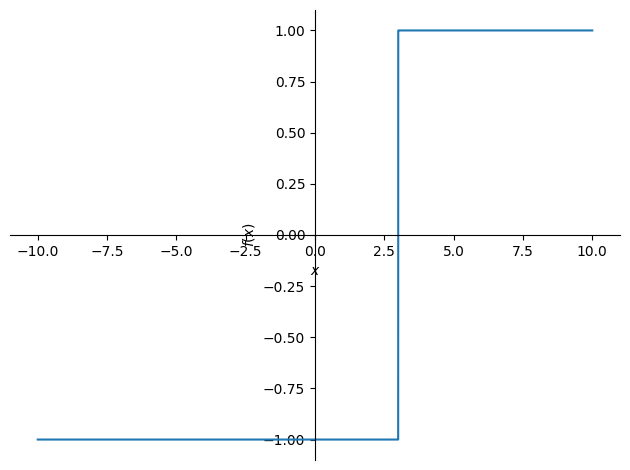

In [29]:
from sympy.plotting import plot as symplot
f1 = (x**3+5)/(x**4+7)
symplot(f1, xlimit = (-6,6), ylimit=(-4,4))
f2 = (x-3)/abs(x-3)
f3 = (x-3)/abs(x-3)
symplot(f2, xlimit = (-6,6), ylimit=(-4,4))
symplot(f3, xlimit = (-6,6), ylimit=(-4,4))

1

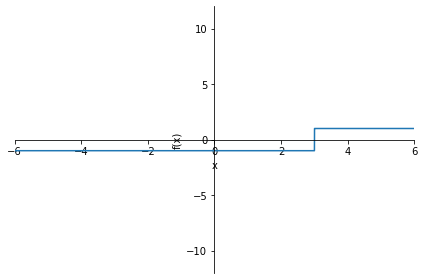

-1

## Ejercicio 2

Sabiendo que $f(x)=\frac{3x+5}{x-3}$ y $g(x)=x^2+1$

Calcula los siguientes límites:

$l1 = \lim\limits_{x \to4}~f(x)$

$l2 = \lim\limits_{x \to4}~g(x)$

$lsum = \lim\limits_{x \to4}~(f(x)+g(x))$

$lrest = \lim\limits_{x \to4}~(f(x)-g(x))$

$lprod = \lim\limits_{x \to4}~(f(x)*g(x))$

$ldiv = \lim\limits_{x \to4}~\frac{f(x)}{g(x)}$

In [41]:
#l1


17

In [42]:
#l2


17

In [43]:
#lsum


34

In [44]:
#lrest


0

In [45]:
#lprod


289

In [46]:
#ldiv


1

## Ejercicio 3

Calcula los límites iterados de las siguientes funciones:

$\lim\limits_{(x,y) \to (4,3)}~\frac{x^2-1}{3x+y}$

$\lim\limits_{(x,y) \to (2,2)}~\frac{x+3}{xy-4}$

In [32]:
# Primera
#lxy
from sympy import *
f1 = (x**2-1)/(3*x+y)
f2=(x+3)/(x*y-4)

limitx = limit(f1, x, 4)
limity = limit(limitx, y, 3)
print(limity)

1


In [34]:
#lyx
from sympy import *
f1 = (x**2-1)/(3*x+y)
f2=(x+3)/(x*y-4)

limity = limit(f1, y, 3)
limitx = limit(limity, x, 4)

print(limitx)

1


In [36]:
# Segunda
#lxy
from sympy import *
f1 = (x**2-1)/(3*x+y)
f2=(x+3)/(x*y-4)

limitx = limit(f2, x, 2)
limity = limit(limitx, y, 2)
print(limity)

oo


In [38]:
#lyx
from sympy import *
f1 = (x**2-1)/(3*x+y)
f2=(x+3)/(x*y-4)

limitx = limit(f2, y, 2)
limity = limit(limitx, x, 2)

print(limity)

oo


## Ejercicio 4

Calcula los límites iterados de la siguiente función y dibuja la función


$\lim\limits_{(x,y) \to (0,0)}~\frac{xy}{x^2+y^2}$

In [51]:
#lxy

0

In [52]:
#lyx


0

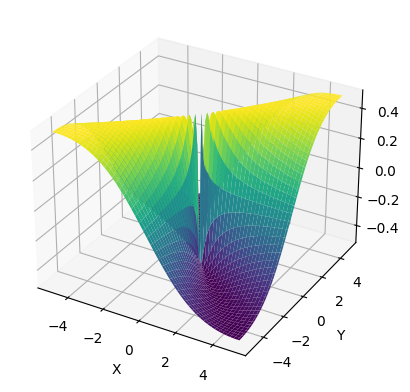

In [41]:
#gráfica
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir la función que se desea graficar
def f(x, y):
    return (x*y)/(x**2+y**2)

# Generar los valores de x e y
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Calcular los valores de z para cada punto (x, y)
Z = f(X, Y)

# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
ax.plot_surface(X, Y, Z, cmap='viridis')

# Configurar los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Mostrar la figura
plt.show()

## Ejercicio 5

Obtén la derivada de la función $sin(x)$ recurriendo a la definición de derivada y utilizando el comando limit

cos(x)

## Ejercicio 6

Obtén la derivada de la matriz:

$\begin{bmatrix}cos(4x) & 3x\\x & sen(5x)\end{bmatrix}$

Verfica información sobre matrices en [https://docs.sympy.org/latest/modules/matrices/matrices.html#creating-matrices]

Matrix([
[-4*sin(4*x),          3],
[          1, 5*cos(5*x)]])

## Ejercicio 7

Calcula la primera derivada parcial respecto a x de las siguientes expresiones:

$tan(x + y)$

$ay + bx + cz$

$x^{0.5} − 3y$

In [49]:
from sympy import *
from math import *
from sympy.abc import a,b,c,x,y,z

diff(a*y+b*x+c*z, x)

b

b

0.5/x**0.5

## Ejercicio 8

Analiza las siguientes expresiones. Crea una función que al introducir las expresiones cree un gráfico con la función junto con sus
raíces, asíntotas y puntos críticos.

$\frac{2x}{x^2+1}$

$\frac{log(x)}{x}$

$\frac{x+1}{\sqrt{x-1}-5}$

$\frac{x^3}{(x-1)^2}-8$

Original:

2*x/(x**2 + 1)

Asíntotas horizontales: 0
Asíntotas verticales: []
Derivada:

-4*x**2/(x**2 + 1)**2 + 2/(x**2 + 1)

Puntos críticos: [-1, 1]
Hay un mínimo en (-1,-1)
Hay un mínimo en (1,1)


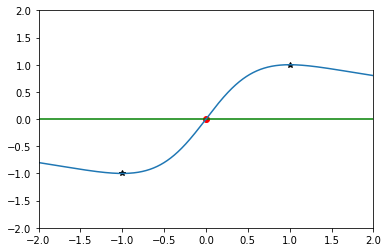

Original:

log(x)/x

Asíntotas horizontales: 0
Asíntotas verticales: [0]
Derivada:

-log(x)/x**2 + x**(-2)

Puntos críticos: [E]
Hay un mínimo en (E,exp(-1))


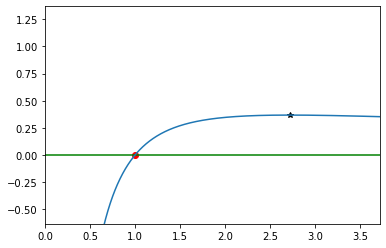

Original:

(x + 1)/(sqrt(x - 1) - 5)

Asíntotas horizontales: oo
Asíntotas verticales: [26]
Derivada:

1/(sqrt(x - 1) - 5) - (x + 1)/(2*sqrt(x - 1)*(sqrt(x - 1) - 5)**2)

Puntos críticos: [30*sqrt(3) + 53]
Hay un máximo en (30*sqrt(3) + 53,(30*sqrt(3) + 54)/(-5 + sqrt(30*sqrt(3) + 52)))


<lambdifygenerated-4>:2: RuntimeWarning: invalid value encountered in sqrt
  return (x + 1)/(sqrt(x - 1) - 5)


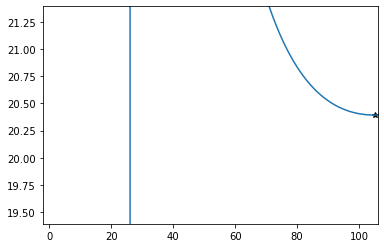

Original:

x**3/(x - 1)**2 - 8

Asíntotas horizontales: oo
Asíntotas verticales: [1]
Derivada:

-2*x**3/(x - 1)**3 + 3*x**2/(x - 1)**2

Puntos críticos: [0, 3]
Hay un mínimo en (0,-8)
Hay un máximo en (3,-5/4)


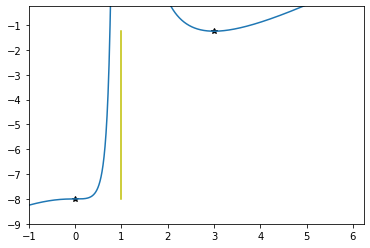

## Ejercicio 9

Una ventana se construye en su parte superior con un semicírculo y en su parte inferior con un rectángulo. Si hay 12m de materiales, ¿cuáles serán las dimensiones de la ventana para que entre la mayor cantidad de luz?

nuevo_y:


-pi*x/2 - x + 6

Puntos criticos: [12/(pi + 4)]
Anchura optima: 24/(pi + 4)
Altura optima: -6*pi/(pi + 4) - 12/(pi + 4) + 6


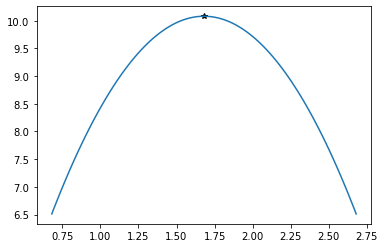

## Ejercicio 10

Determina los puntos sobre $y = x^2 + 1$ más cercanos a $(0, 2)$

Puntos críticos: [0, -sqrt(2)/2, sqrt(2)/2]


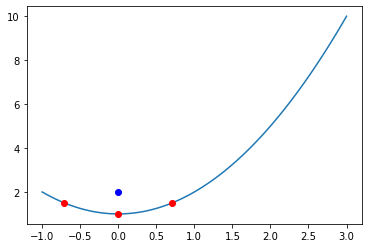

## Ejercicio 11

Calcula la matriz Jacobiana de $g(x, y, z) = (e^x, cos(y), sen(z))$

Verifica cómo calcular la jacobiana en [https://docs.sympy.org/latest/modules/matrices/matrices.html]

Matrix([
[exp(x),       0,      0],
[     0, -sin(y),      0],
[     0,       0, cos(z)]])

## Ejercicio 12

Calcula la matriz Hessiana de la función $f (x, y) = xy + 2zx$

Verifica cómo calcular la Hessiana en [https://docs.sympy.org/latest/modules/matrices/matrices.html]

Matrix([
[0, 1, 2],
[1, 0, 0],
[2, 0, 0]])

## Ejercicio 11

Representa las siguientes funciones y calcula su gradiente

$f (x, y) = x^2y^3$

$g(x, y) = xe^{−x^2−y^2}$

Recuerda que el **gradiente** es el vector formado por las derivadas parciales de una función **escalar**.

La matriz **jacobiana** es la matriz formada por las derivadas parciales de una función vectorial. Sus vectores son los **gradientes** de los respectivos componentes de la función.

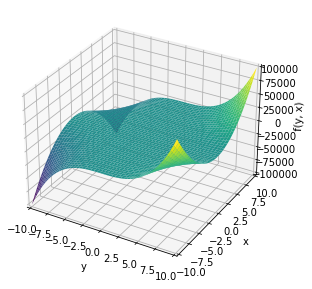

Matrix([[2*x*y**3, 3*x**2*y**2]])

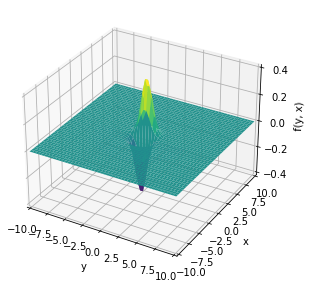

Matrix([[-2*x**2*exp(-x**2 - y**2) + exp(-x**2 - y**2), -2*x*y*exp(-x**2 - y**2)]])